In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#import all libraries
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
#load the datasets
trainingData = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
# viewing the data sample
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# show all columns

X = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']

X_features = trainingData[X]

X_features.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Text(0.5, 1.0, 'Correlation Heatmap')

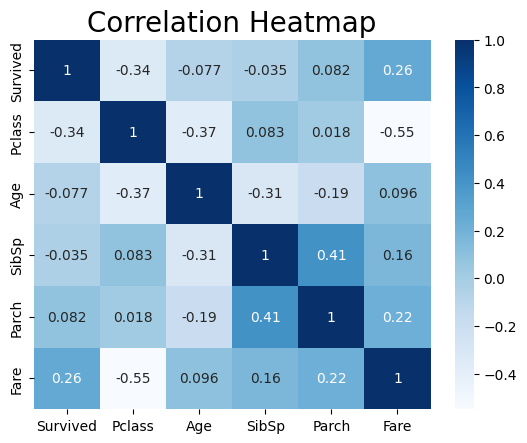

In [6]:
#correlation heatmap
heatmap =  sns.heatmap(X_features.corr(), cmap = "Blues", annot = True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':20})

In [7]:
#feature selection

Final_X = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
Final_X_features = trainingData[Final_X]
Y = trainingData['Survived']

In [8]:
#load the test Data
testingData = pd.read_csv("/kaggle/input/titanic/test.csv")
testX_features = ['Pclass', 'Age', 'SibSp','Parch', 'Fare']
testX = testingData[testX_features]
testX.isnull().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [9]:
Final_X_features.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
#impute both datasets

#Age
imputer = SimpleImputer(strategy='mean')

Final_X_features['Age'] = imputer.fit_transform(Final_X_features[['Age']])
testX['Age'] = imputer.fit_transform(testX[['Age']])

#Fare
#testX['Fare'] = imputer.fit_transform(testX)


/tmp/ipykernel_31/2447469037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_X_features['Age'] = imputer.fit_transform(Final_X_features[['Age']])
/tmp/ipykernel_31/2447469037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Age'] = imputer.fit_transform(testX[['Age']])


In [48]:
#decsion tree model

#let the model decide itself
model = DecisionTreeClassifier(random_state = 42)

model.fit(Final_X_features, Y)

pred = model.predict(testX)

ValueError: could not broadcast input array from shape (5,418) into shape (1,418)

In [44]:
print(pred)

[0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 1]


In [40]:
#generate the submission
output = pd.DataFrame({'PassengerId':testingData.PassengerId, 'Survived': pred})

output.to_csv('submission.csv', index = False)